# **Proposta de Trabalho 1 - Mineração de dados**

### **Professor:** Wagner Meira Jr.
### **Aluno 1:** Giovanna Paranhos
### **Matrícula 1:** 2023655467
### **Aluno 2:** Samir Saliba
### **Matrícula 2:** 2022685118


### **Tema:** Subtipos de Câncer de Cadela
### **Base de dados:** (link)


In [44]:
import os
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [45]:
data_directory = 'data'
class_files = {
    'cs': 'cs.xls',
    'css': 'css.xls',
    'cmp': 'cmp.xls',
    'ctmsm': 'ctmsm.xls',
    'normal': 'normal.xls'
}

def read_data(args):
    class_name, file_path = args
    file_path = os.path.join(data_directory, file_path)
    data = pd.read_excel(file_path, index_col=0)
    data['label'] = class_name
    return data

dataframes = list(map(read_data, class_files.items()))
df = pd.concat(dataframes)

In [46]:
class_files = {
    'cs': 'cs.xls',
    'css': 'css.xls',
    'cmp': 'cmp.xls',
    'ctmsm': 'ctmsm.xls',
    'normal': 'normal.xls'
}

In [47]:
df.head(5)

,Cell Segment Area,Cell Segment Circularity,Cell Segment Coverage,Cell Segment Eccentricity,Cell Segment PL Angle SDI,Cell Segment PL Coherence,Cell Segment PL Entropy,Cell Segment PL Local Coherence,Cell Segment PL Mean,Cell Segment PL STD,...,Fibre Segment SHG Entropy,Fibre Segment SHG Local Coherence,Fibre Segment SHG Mean,Fibre Segment SHG STD,File,Mean Fibre Length,Mean Fibre Waviness,No. Cells,No. Fibres,label
0,195098.485,0.158,0.778,0.404,0.042,0.016,11.104,0.615,303.301,224.355,...,10.291,0.530,223.997,245.719,cs-E07-14-2-c2,28.576,0.924,5,331,cs
1,60607.604,0.182,0.629,0.791,0.010,0.048,10.869,0.617,306.038,297.804,...,10.083,0.564,300.150,178.365,cs-E001-16-1-c1,29.842,0.929,16,524,cs
2,20641.323,0.358,0.633,0.722,0.011,0.036,10.421,0.608,268.334,296.809,...,10.503,0.567,341.633,247.647,cs-E001-16-1-c2,30.130,0.914,30,470,cs
3,51121.281,0.232,0.662,0.821,0.010,0.017,10.209,0.606,214.152,259.057,...,10.418,0.570,361.217,290.895,cs-E001-16-1-c3,24.697,0.938,24,524,cs
4,10176.146,0.319,0.565,0.759,0.015,0.022,10.227,0.597,225.823,204.288,...,9.761,0.540,289.479,142.085,cs-E001-16-1-c4,30.501,0.944,34,476,cs


# 2. Data understanding (Entendimento dos dados)


In [48]:
print(f"Classes: {df.label.unique()}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

Classes: ['cs' 'css' 'cmp' 'ctmsm' 'normal']
Number of Rows: 1384
Number of Columns: 31

Data Types:
Cell Segment Area                    float64
Cell Segment Circularity             float64
Cell Segment Coverage                float64
Cell Segment Eccentricity            float64
Cell Segment PL Angle SDI            float64
Cell Segment PL Coherence            float64
Cell Segment PL Entropy              float64
Cell Segment PL Local Coherence      float64
Cell Segment PL Mean                 float64
Cell Segment PL STD                  float64
Fibre Angle SDI                      float64
Fibre Network Connectivity           float64
Fibre Network Cross-Link Density     float64
Fibre Network Degree                 float64
Fibre Network Eigenvalue             float64
Fibre Segment Area                   float64
Fibre Segment Circularity            float64
Fibre Segment Coverage               float64
Fibre Segment Eccentricity           float64
Fibre Segment SHG Angle SDI          float64

**Observação**: 29 colunas, excluindo label e file. Não há nulos nas colunas, o que é um ótimo sinal.

In [49]:
df = df.drop(columns=['File'])
features = df.columns[:-1]

In [50]:
print("\nSummary Statistics:")
display(df.describe().T)


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Cell Segment Area,1384.000,92173.085,52119.539,3387.854,49359.777,85962.074,128892.459,231366.075
Cell Segment Circularity,1384.000,0.192,0.107,0.039,0.119,0.161,0.232,0.736
Cell Segment Coverage,1384.000,0.645,0.117,0.164,0.573,0.656,0.728,0.913
Cell Segment Eccentricity,1384.000,0.738,0.151,0.050,0.676,0.779,0.844,0.969
Cell Segment PL Angle SDI,1384.000,0.013,0.007,0.005,0.008,0.011,0.015,0.072
Cell Segment PL Coherence,1384.000,0.041,0.038,0.000,0.016,0.031,0.054,0.303
Cell Segment PL Entropy,1384.000,9.605,0.957,5.118,9.061,9.724,10.267,11.850
Cell Segment PL Local Coherence,1384.000,0.580,0.038,0.471,0.550,0.580,0.608,0.674
Cell Segment PL Mean,1384.000,163.482,103.376,17.540,90.435,142.721,208.060,812.646
Cell Segment PL STD,1384.000,179.882,108.907,23.415,101.880,155.715,224.048,916.574


**Observação:** Há uma grande diferença na escala entre as colunas, portanto será adequado realizar a normalização dos dados antes da modelagem. ALém disso, a média e a mediana das colunas estão próximas, o que facilita a normalização (i.e. não há um grande outlier deturpando fortemente a média).

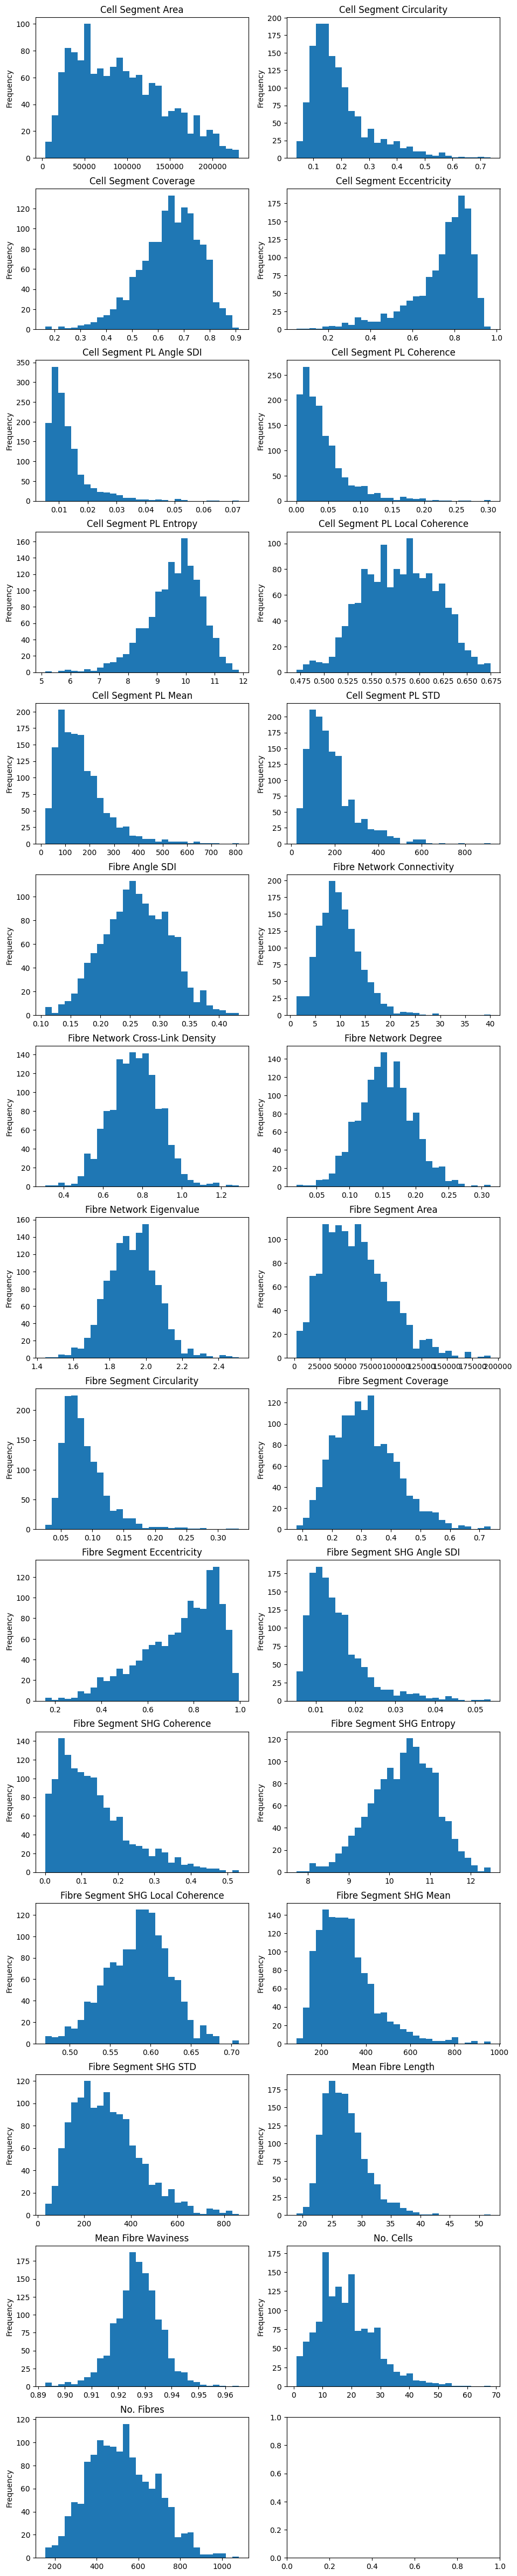

In [51]:
row_n = 15/2
col_m = 2
fig, axs = plt.subplots(15, 2, figsize=(col_m*4.8, row_n*6.4))
fig.tight_layout(pad=2.0)

for (i, col_name) in enumerate(features):
    row, col = i//2, i%2
    ax = axs[row][col]
    ax.title.set_text(col_name)
    df[col_name].plot(kind='hist', bins=30, layout=(15,2), ax=ax)

**Observação:** Algumas features seguem uma distribuição normal ou semelhante à normal com uma distorção (skew) em relação à média, como No.Fibres, Fibre Segment SHG STD, Fibre Segment ircularity. Outras features, entretanto, apresentam distribuições mais caóticas, como Segment Cell Area. 

# 3. Data preparation (Preparação dos dados)

In [52]:
scaler = StandardScaler()
scaled_df = df.copy()
scaled_df[features] = scaler.fit_transform(scaled_df[features])

In [53]:
print("\nSummary Statistics:")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
display(scaled_df.describe().T)


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Cell Segment Area,1384.000,0.000,1.000,-1.704,-0.822,-0.119,0.705,2.672
Cell Segment Circularity,1384.000,-0.000,1.000,-1.430,-0.680,-0.294,0.373,5.069
Cell Segment Coverage,1384.000,-0.000,1.000,-4.115,-0.616,0.091,0.703,2.288
Cell Segment Eccentricity,1384.000,-0.000,1.000,-4.555,-0.406,0.274,0.707,1.535
Cell Segment PL Angle SDI,1384.000,-0.000,1.000,-1.045,-0.620,-0.274,0.244,7.980
Cell Segment PL Coherence,1384.000,-0.000,1.000,-1.072,-0.664,-0.272,0.337,6.840
Cell Segment PL Entropy,1384.000,-0.000,1.000,-4.690,-0.569,0.124,0.692,2.347
Cell Segment PL Local Coherence,1384.000,-0.000,1.000,-2.817,-0.763,0.014,0.743,2.469
Cell Segment PL Mean,1384.000,-0.000,1.000,-1.412,-0.707,-0.201,0.431,6.282
Cell Segment PL STD,1384.000,0.000,1.000,-1.437,-0.716,-0.222,0.406,6.767


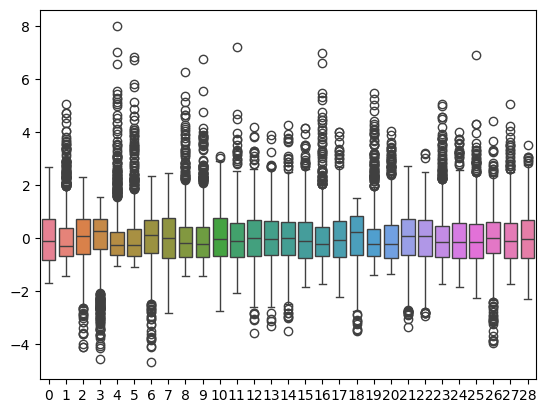

In [54]:
box_plot = sns.boxplot(data=scaled_df)
labels = list(range(len(features)))
_ = box_plot.set_xticks(ticks=labels, labels=labels)

# 4. Modeling (Modelagem)

In [55]:
discrete_df = scaled_df.copy()
for col in features:
    discrete_df[col] = pd.qcut(scaled_df[col], q=4, labels=['q1', 'q2', 'q3', 'q4'])

discrete_df.head(5)

,Cell Segment Area,Cell Segment Circularity,Cell Segment Coverage,Cell Segment Eccentricity,Cell Segment PL Angle SDI,Cell Segment PL Coherence,Cell Segment PL Entropy,Cell Segment PL Local Coherence,Cell Segment PL Mean,Cell Segment PL STD,...,Fibre Segment SHG Coherence,Fibre Segment SHG Entropy,Fibre Segment SHG Local Coherence,Fibre Segment SHG Mean,Fibre Segment SHG STD,Mean Fibre Length,Mean Fibre Waviness,No. Cells,No. Fibres,label
0,q4,q2,q4,q1,q4,q2,q4,q4,q4,q4,...,q1,q2,q1,q2,q2,q3,q2,q1,q1,cs
1,q2,q3,q2,q3,q2,q3,q4,q4,q4,q4,...,q1,q2,q2,q3,q1,q4,q3,q2,q3,cs
2,q1,q4,q2,q2,q3,q3,q4,q4,q4,q4,...,q2,q3,q2,q3,q2,q4,q1,q4,q2,cs
3,q2,q3,q3,q3,q2,q2,q3,q3,q4,q4,...,q1,q3,q2,q3,q3,q2,q4,q3,q3,cs
4,q1,q4,q1,q2,q4,q2,q3,q3,q4,q3,...,q1,q1,q1,q2,q1,q4,q4,q4,q2,cs


In [56]:
data_encoded = pd.get_dummies(discrete_df, columns=features)
data_encoded.head(5)

,label,Cell Segment Area_q1,Cell Segment Area_q2,Cell Segment Area_q3,Cell Segment Area_q4,Cell Segment Circularity_q1,Cell Segment Circularity_q2,Cell Segment Circularity_q3,Cell Segment Circularity_q4,Cell Segment Coverage_q1,...,Mean Fibre Waviness_q3,Mean Fibre Waviness_q4,No. Cells_q1,No. Cells_q2,No. Cells_q3,No. Cells_q4,No. Fibres_q1,No. Fibres_q2,No. Fibres_q3,No. Fibres_q4
0,cs,False,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,cs,False,True,False,False,False,False,True,False,False,...,True,False,False,True,False,False,False,False,True,False
2,cs,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
3,cs,False,True,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
4,cs,True,False,False,False,False,False,False,True,True,...,False,True,False,False,False,True,False,True,False,False


In [57]:
frequent_itemsets_per_class = {}
min_support = 0.2

In [58]:
for class_name in class_files.keys():
    print(f"Frequent Itemsets for {class_name}:")
    data = data_encoded[data_encoded.label == class_name].drop(columns='label')
    freq_itemsets_col = apriori(data, min_support=min_support, use_colnames=True) #MANUALLY FIXED DATAFRAME NAME
    print(freq_itemsets_col)
    frequent_itemsets_per_class[class_name] = freq_itemsets_col

Frequent Itemsets for cs:
     support                                           itemsets
0      0.236                             (Cell Segment Area_q2)
1      0.271                             (Cell Segment Area_q3)
2      0.323                             (Cell Segment Area_q4)
3      0.239                      (Cell Segment Circularity_q2)
4      0.288                      (Cell Segment Circularity_q3)
..       ...                                                ...
176    0.291  (Fibre Segment SHG Entropy_q1, Fibre Segment S...
177    0.202  (Fibre Segment Eccentricity_q4, No. Cells_q1, ...
178    0.213  (Fibre Segment Eccentricity_q4, No. Fibres_q1,...
179    0.277  (No. Fibres_q1, No. Cells_q1, Cell Segment Cov...
180    0.207  (Fibre Segment SHG Entropy_q1, Fibre Segment S...

[181 rows x 2 columns]
Frequent Itemsets for css:
     support                                           itemsets
0      0.315                             (Cell Segment Area_q1)
1      0.203               

In [59]:
association_rules_per_class = {}
min_confidence = 0.7

In [60]:
for class_name, freq_itemsets_class in frequent_itemsets_per_class.items():
    association_rules_df = association_rules(freq_itemsets_class, metric="confidence", min_threshold=min_confidence)
    print(f"\nAssociation Rules for {class_name}:")
    print(association_rules_df)
    association_rules_per_class[class_name] = association_rules_df 
    print('='*180)


Association Rules for cs:
                                           antecedents  \
0                               (Cell Segment Area_q4)   
1                               (Cell Segment Area_q4)   
2                               (Cell Segment Area_q4)   
3                               (Cell Segment Area_q4)   
4                           (Cell Segment Coverage_q3)   
..                                                 ...   
129  (Fibre Segment SHG STD_q1, Fibre Segment SHG E...   
130  (Fibre Segment SHG Angle SDI_q1, Fibre Segment...   
131  (Fibre Segment SHG Angle SDI_q1, Fibre Segment...   
132  (Fibre Segment SHG Angle SDI_q1, Fibre Segment...   
133  (Fibre Segment SHG Angle SDI_q1, Fibre Segment...   

                                           consequents  antecedent support  \
0                           (Cell Segment Coverage_q4)               0.323   
1                          (Fibre Segment Coverage_q1)               0.323   
2                                       (N

# 5. Evaluation (Validação)
